<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/3_DeepLearning/11-4_LSTM_%ED%98%B8%ED%9D%A1%EA%B8%B0%20%EC%A7%88%ED%99%98%20%EC%82%AC%EB%A7%9D%EC%9E%90%20%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기
- 영국의 호흡기 질환으로 인한 사망자 수 데이터를 이용
- LSTM을 이용하여 시계열 예측을 구현하고 RNN, ARIMA 모형과 비교한다.

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
%matplotlib inline

In [ ]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
data = sm.datasets.get_rdataset('deaths', 'MASS')
df   = data.data
df.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


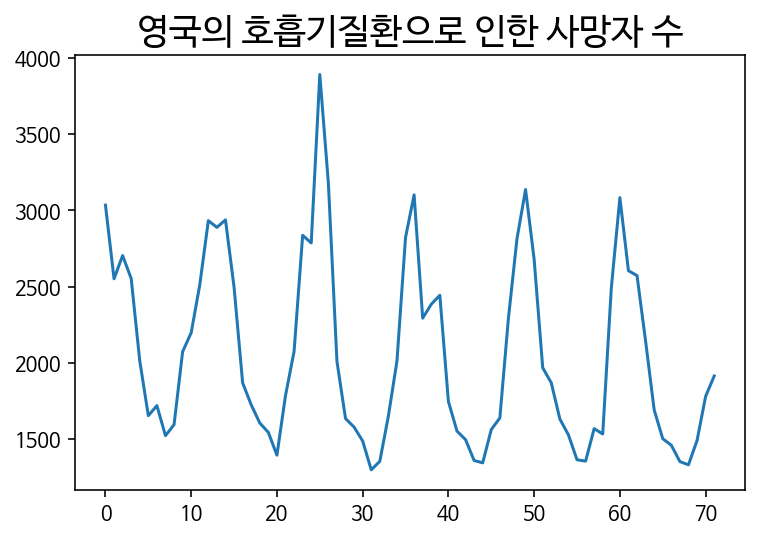

In [ ]:
df.value.plot()
plt.title('영국의 호흡기질환으로 인한 사망자 수', fontsize=18)
plt.show()

# 데이터 변형
- 모형 간의 비교를 위해 데이터를 변형
- 2000 이상의 값들을 모두 2000으로 수렴한다.

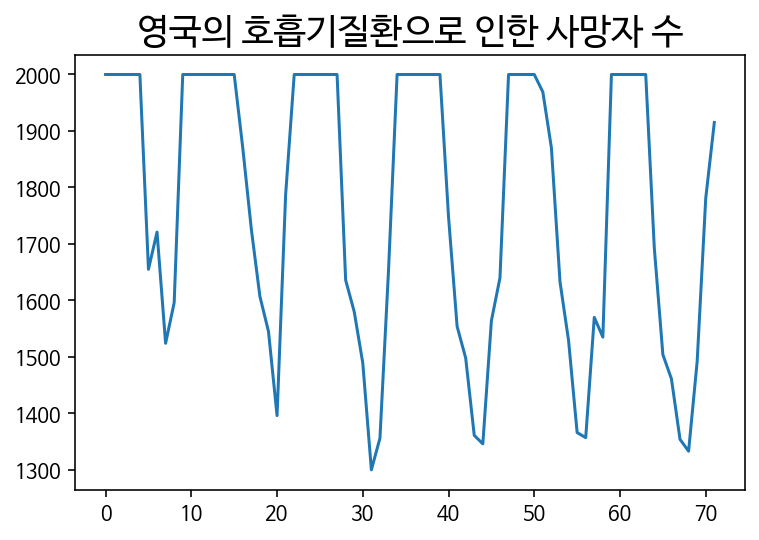

In [ ]:
df['cliped_value'] = df.value.clip(upper=2000)
df.cliped_value.plot()
plt.title('영국의 호흡기질환으로 인한 사망자 수', fontsize=18)
plt.show()

# ARMA 모형 구축

In [ ]:
model_ARMA  = sm.tsa.ARMA(df['cliped_value'], (1,2))
result_ARMA = model_ARMA.fit()

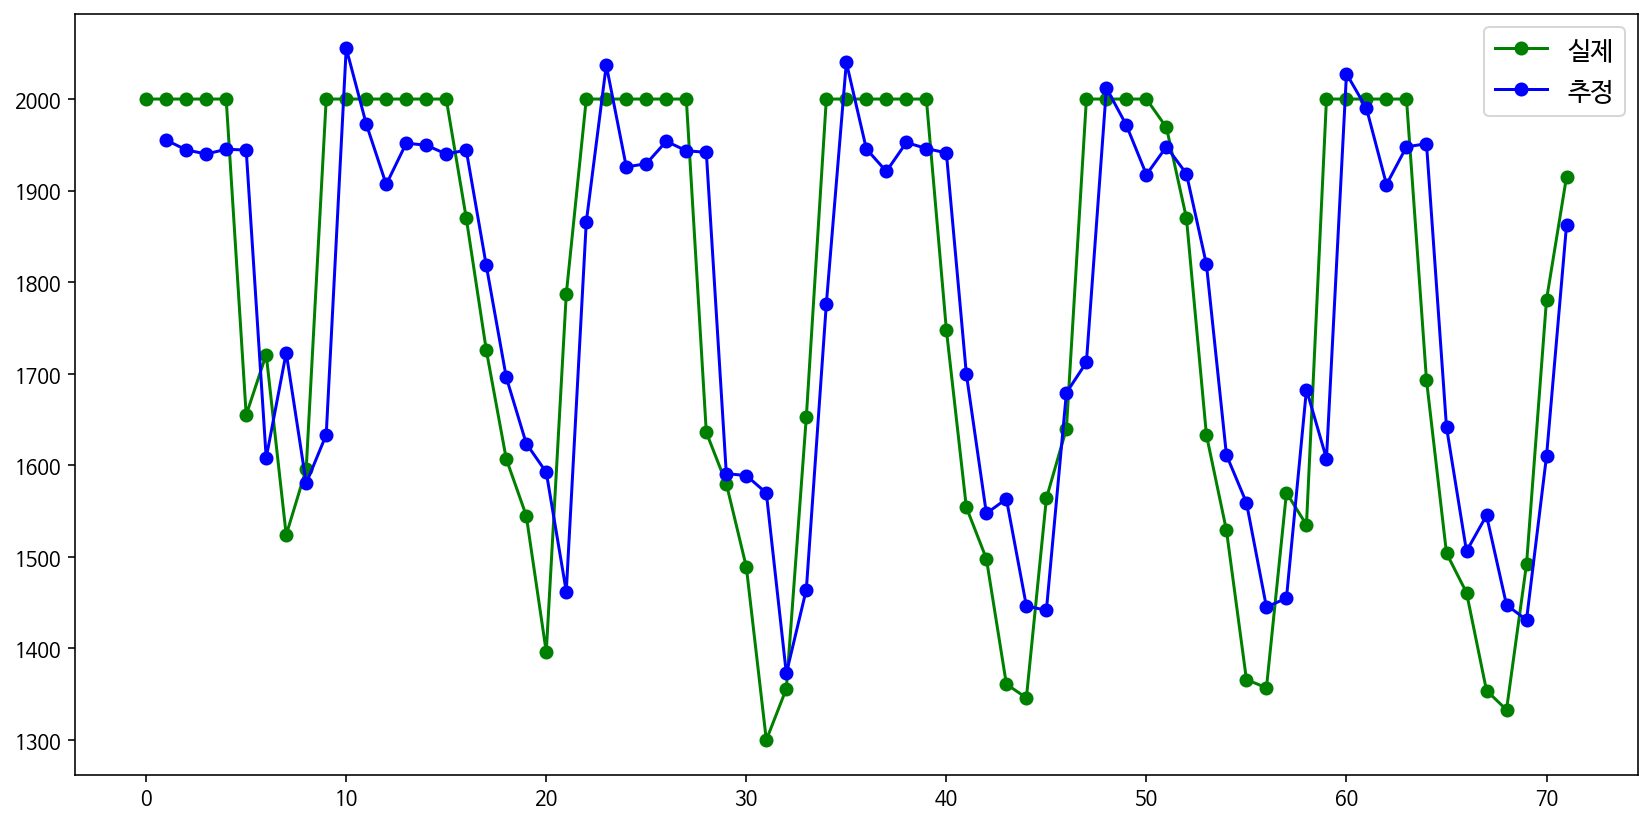

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(df['cliped_value'], 'go-', label='실제')
plt.plot(result_ARMA.predict(1), 'bo-', label='추정')
plt.legend(fontsize=13)
plt.show()

# RNN
- RNN을 이용하여 시계열을 풀어본다.
- 타임스텝은 7로 설정한다.

In [ ]:
ts                     = 7
df['cliped_std_value'] = df.cliped_value.map(lambda x : (x - df.cliped_value.mean()) / np.std(df.cliped_value))
X_train                = np.asarray([np.array([df.cliped_value.values[i + j] 
                                               for j in range(ts)]) for i in range(len(df.cliped_value) - ts)]).reshape(-1, ts, 1)
y_train                = df.cliped_std_value.values[ts:]
X_train.shape, y_train.shape

((65, 7, 1), (65,))

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [ ]:
model_RNN = Sequential()
model_RNN.add(SimpleRNN(100, input_shape=(ts, 1)))
model_RNN.add(Dense(1, activation='linear'))
model_RNN.compile(loss='mse', optimizer='adam')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


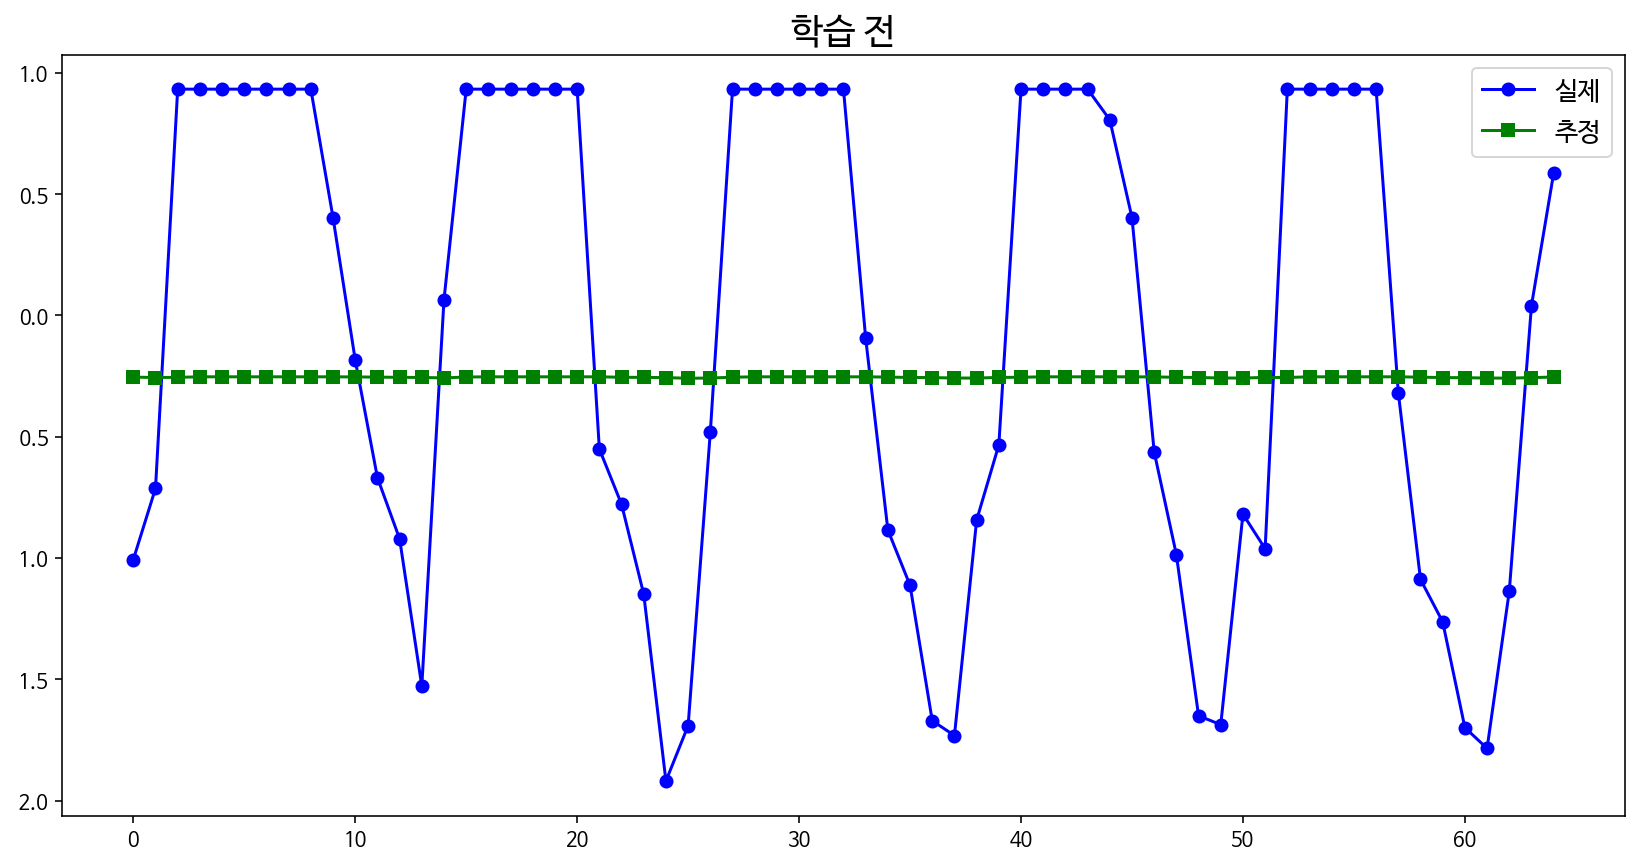

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(y_train[:], 'bo-', label='실제')
plt.plot(model_RNN.predict(X_train[:, :, :]), 'gs-', label='추정')
plt.legend(fontsize=13)
plt.title('학습 전', fontsize=18)
plt.show()

In [ ]:
ts                     = 7
df['cliped_std_value'] = df.cliped_value.map(lambda x : (x - df.cliped_value.mean()) / np.std(df.cliped_value))
X_train                = np.asarray([np.array([df.cliped_std_value.values[i + j] 
                                               for j in range(ts)]) for i in range(len(df.cliped_std_value) - ts)]).reshape(-1, ts, 1)
y_train                = df.cliped_std_value.values[ts:]
X_train.shape, y_train.shape

((65, 7, 1), (65,))

In [ ]:
history_RNN = model_RNN.fit(X_train, y_train, epochs=1000, verbose=0)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


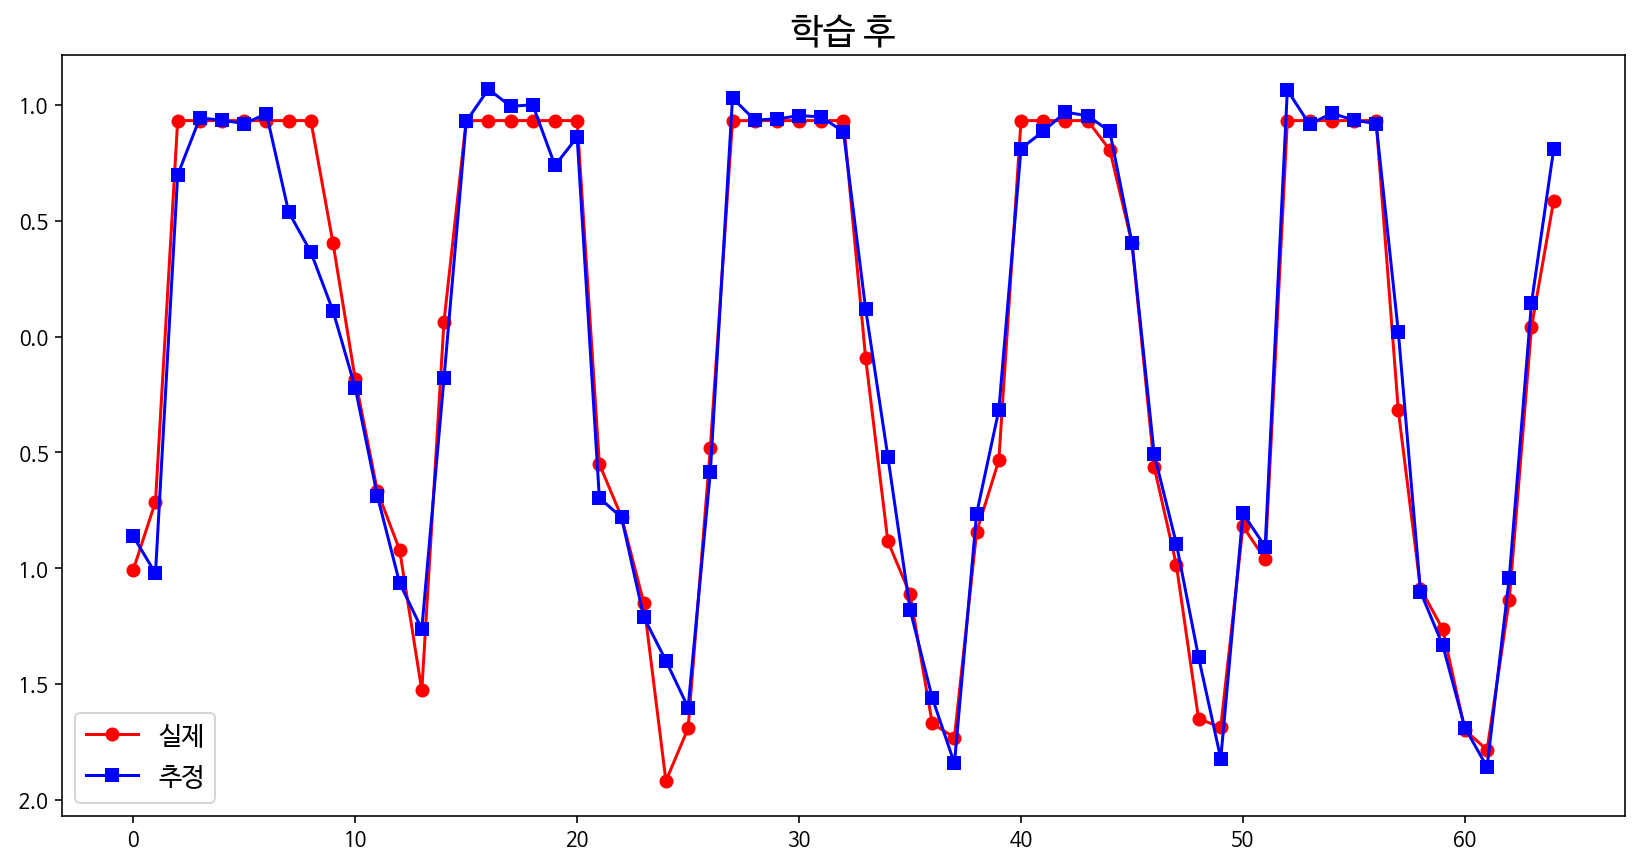

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(y_train[:], 'ro-', label='실제')
plt.plot(model_RNN.predict(X_train[:, :, :]), 'bs-', label='추정')
plt.legend(fontsize=13)
plt.title('학습 후', fontsize=18)
plt.show()

# LSTM

In [ ]:
from keras.layers import LSTM

model_LSTM = Sequential()
model_LSTM.add(LSTM(100, input_shape=(ts, 1)))
model_LSTM.add(Dense(1, activation='linear'))
model_LSTM.compile(loss='mse', optimizer='adam')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


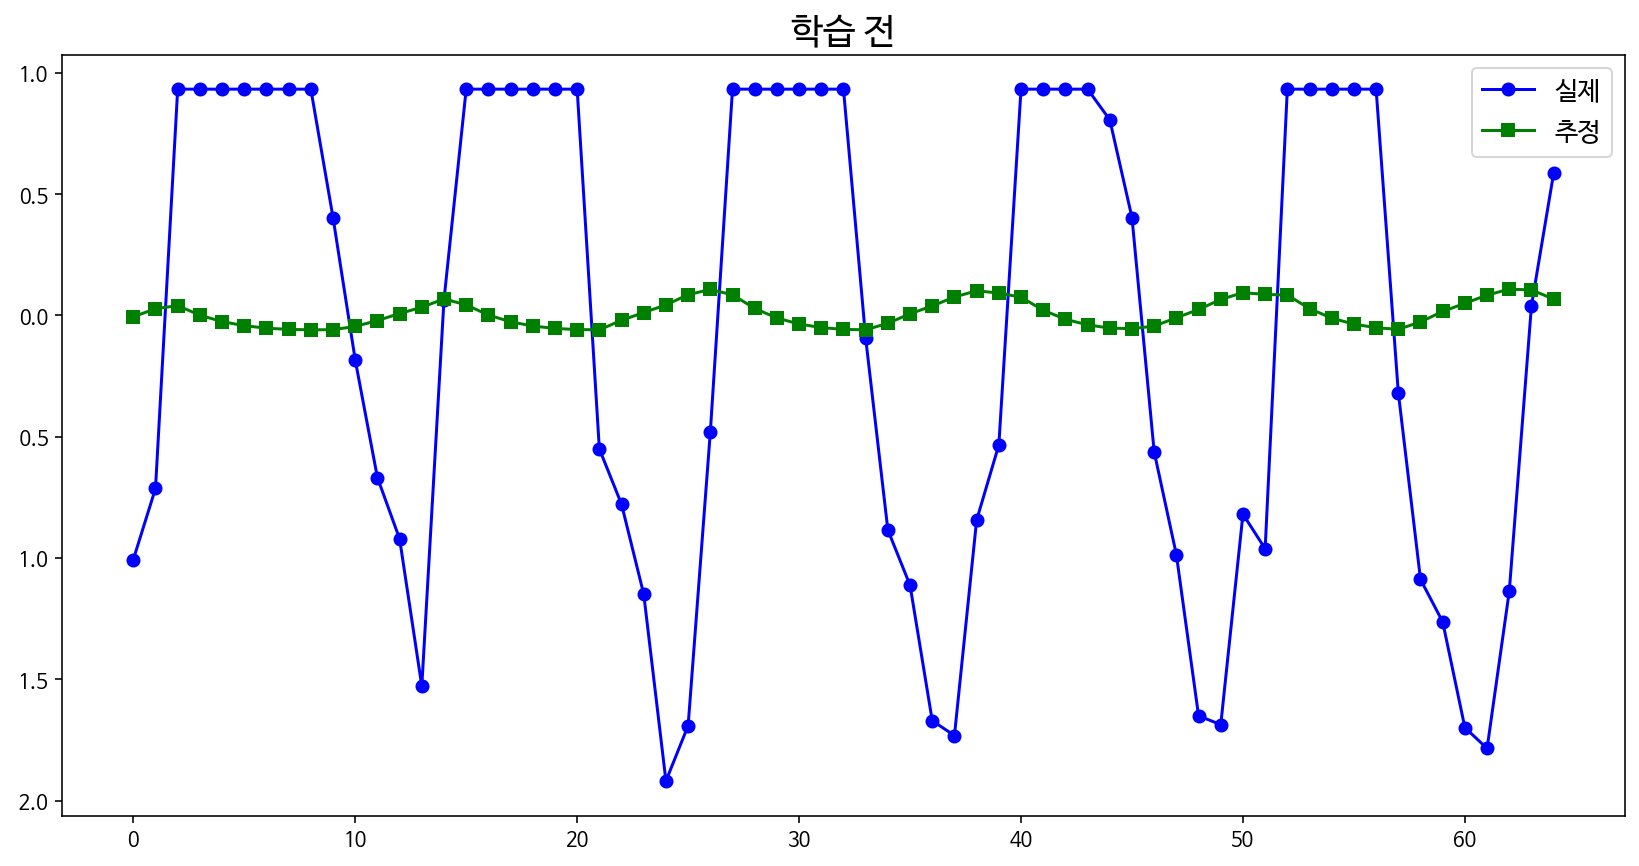

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(y_train[:], 'bo-', label='실제')
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'gs-', label='추정')
plt.legend(fontsize=13)
plt.title('학습 전', fontsize=18)
plt.show()

In [ ]:
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=1000, verbose=0)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

In [ ]:
plt.plot(history_RNN.history['loss'])
plt.title('Loss', fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


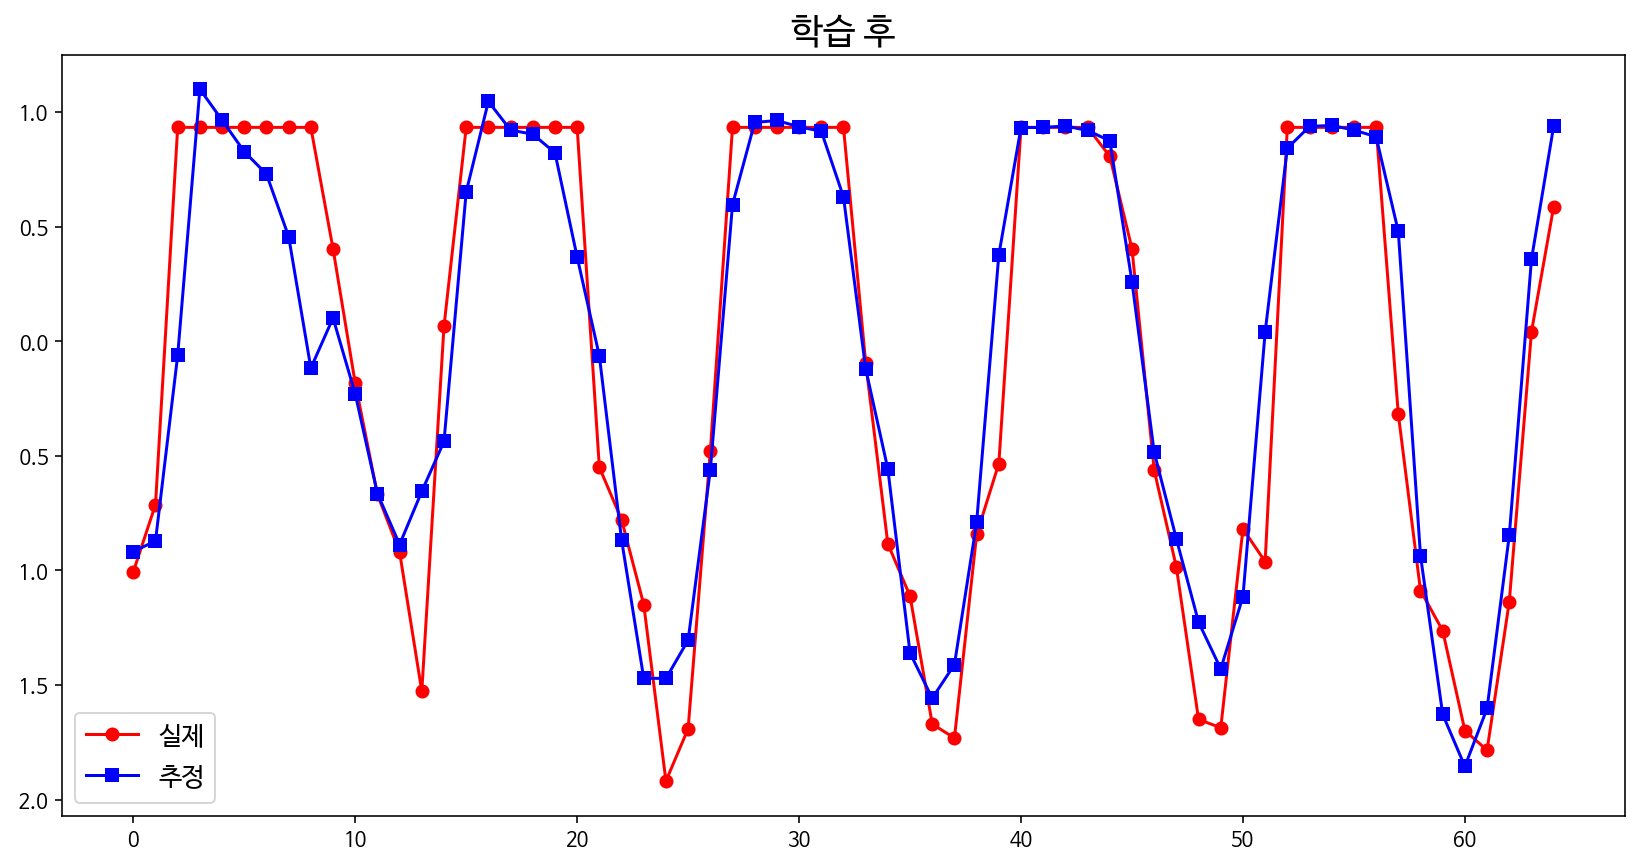

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(y_train[:], 'ro-', label='실제')
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'bs-', label='추정')
plt.legend(fontsize=13)
plt.title('학습 후', fontsize=18)
plt.show()

# Bi - directional LSTM

In [ ]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(ts, 1))))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(X_train, y_train, epochs=3000, verbose=0)

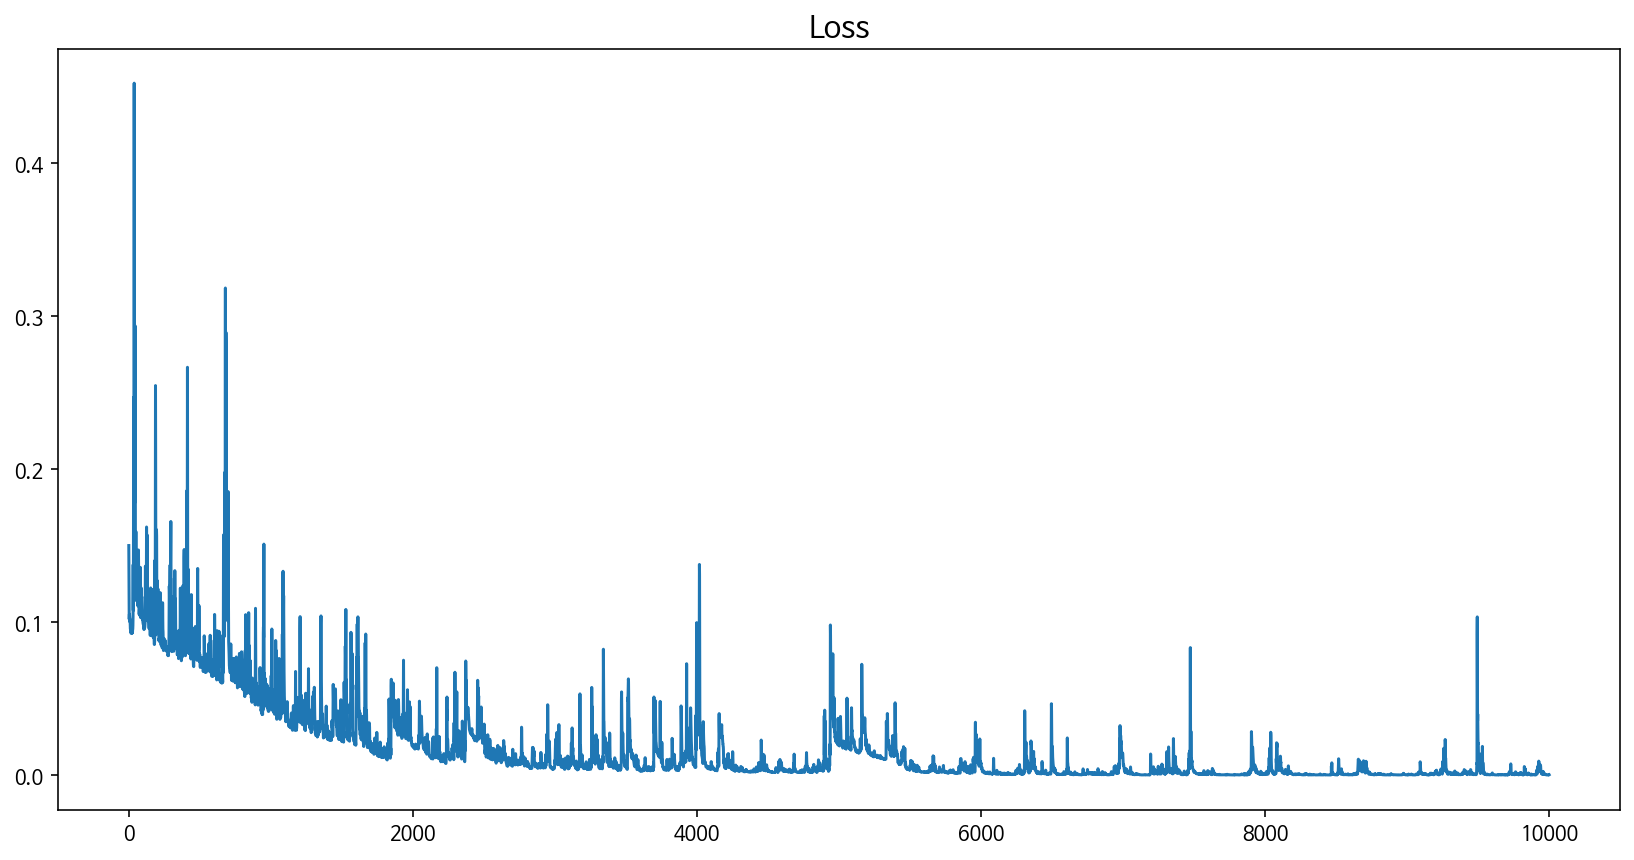

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'])
plt.title('Loss', fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


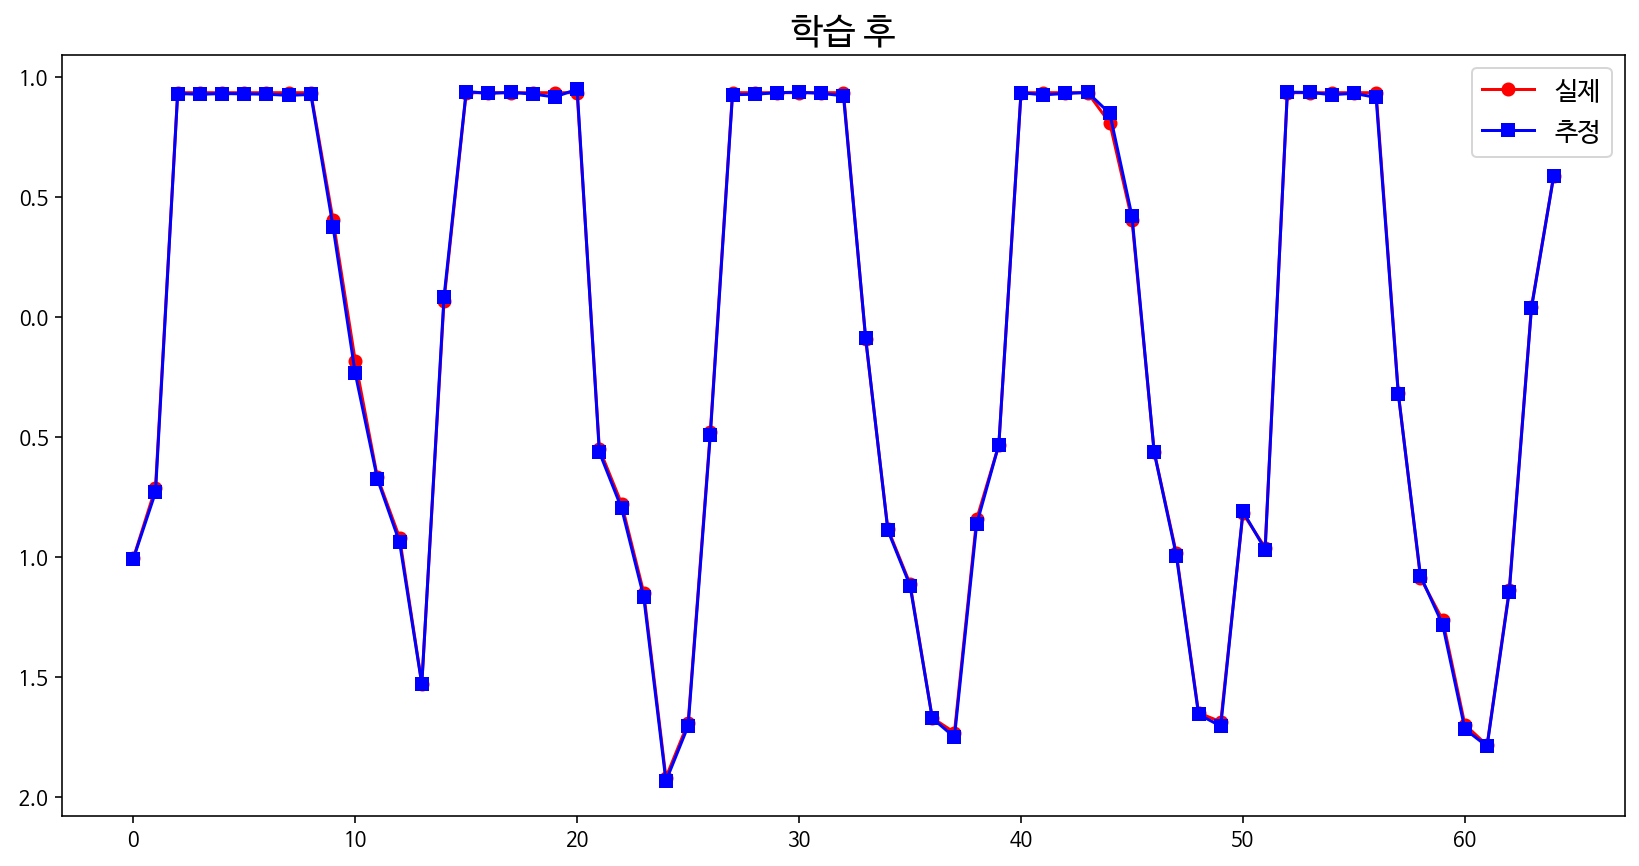

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(y_train[:], 'ro-', label='실제')
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='추정')
plt.legend(fontsize=13)
plt.title('학습 후', fontsize=18)
plt.show()